In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas
import seaborn as sns
import random
from fbprophet import Prophet
import matplotlib.pyplot as plt

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
df = pandas.read_csv('processed_sample_data.csv')

In [3]:
df.columns

Index(['date', 'users', ' sessionLength', 'event_count'], dtype='object')

In [4]:
test_df = df[4080:]
train_df = df[~df.isin(test_df)].dropna()

In [5]:
df

,date,users,sessionLength,event_count
0,2019-01-02 00:00:00,45,282,52
1,2019-01-02 01:00:00,62,254,67
2,2019-01-02 02:00:00,97,213,109
3,2019-01-02 03:00:00,147,215,152
4,2019-01-02 04:00:00,172,232,185
5,2019-01-02 05:00:00,193,236,210
6,2019-01-02 06:00:00,201,226,221
7,2019-01-02 07:00:00,237,203,253
8,2019-01-02 08:00:00,257,216,274
9,2019-01-02 09:00:00,250,247,279


## Fb Prophet model for fitting the given time series

In [8]:
model = Prophet()
model.fit(train_df.reset_index().rename(columns={'date':'ds', 'event_count':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/sarvesh/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
model_test =  model.predict(df=test_df.reset_index().rename(columns={'date':'ds'}))

In [11]:
np.mean(np.abs(np.array(test_df['event_count']) - np.array(model_test['yhat'])))

41.87339006924334

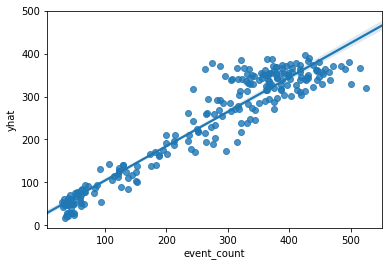

In [12]:
sns.regplot(test_df['event_count'],model_test['yhat'])

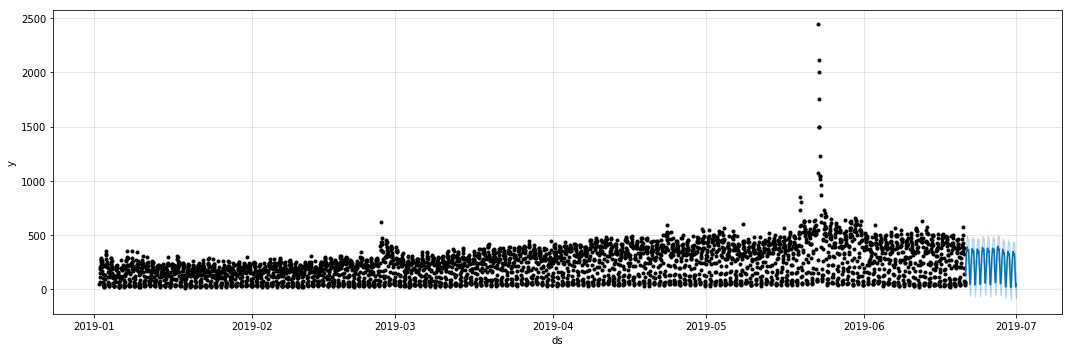

In [13]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(model_test, ax=ax)

## Defining relationship between Users,SessionLength and Event_Count

In [133]:
linear = nn.Linear(1,2)

In [134]:
x = np.array(train_df['event_count']).T
y = []

In [135]:
x_val = np.array(test_df['event_count']).T
y_val = []

In [136]:
for i in train_df.iterrows():
    y.append(np.array([i[1][1],i[1][2]]))
#     break

In [137]:
for i in test_df.iterrows():
    y_val.append(np.array([i[1][1],i[1][2]]))
#     break

In [138]:
params = [{'params': linear.parameters()}]

In [139]:
optimizer = optim.Adam(params, lr=1e-3)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',verbose=True,patience=5000)

In [140]:
train_loss_array = []
val_loss_array = []

In [141]:
import sys

In [142]:
for epoch in range(100000):
    
    x = Variable(torch.FloatTensor(x))
    x_input = x.unsqueeze(1)
    y_hat = linear(F.relu(x_input))
    x_val = Variable(torch.FloatTensor(x_val))
    x_input_val = x_val.unsqueeze(1)
    y_hat_val = linear(F.relu(x_input_val))
    train_loss = torch.mean(torch.abs(torch.sub(y_hat,torch.FloatTensor(y))))
    val_loss = torch.mean(torch.abs(torch.sub(y_hat_val,torch.FloatTensor(y_val))))
#     scheduler.step(val_loss/len(y_val))
    train_loss.backward()
    optimizer.step()
    train_loss_array.append(train_loss.item())
    
    val_loss_array.append(val_loss.item())
    sys.stdout.write('\r epoch-{0} val-loss-{1}'.format(epoch,min(val_loss_array)))
#     print("epoch--",epoch,"--loss-",train_loss,"--val-",val_loss)
    

 epoch-99999 val-loss-36.514175415039066

In [110]:
min(val_loss_array)

79.62158203125

In [111]:
linear(torch.FloatTensor([52]))

tensor([-20.2912, 320.2692], grad_fn=<AddBackward0>)

In [146]:
model_dict = {
     'model': linear.state_dict(),
}

In [147]:
torch.save(model_dict,'model.tar')